In [1]:
# Alexander Domagala
# ECE 6560 - Final Project - TV
# Spring 2024

# Performs image smoothing using TV diffusion
# (linear penalty)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

(100, 100)


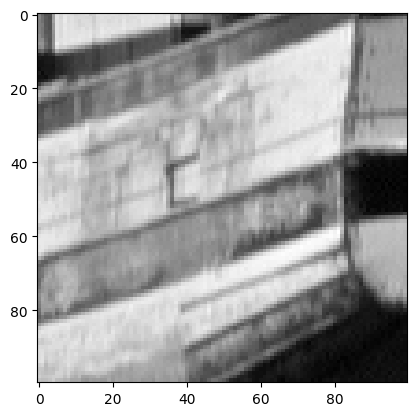

In [2]:
# load image
start_pix = 300
end_pix = start_pix+100
img = Image.open('../images/boats.bmp')
img = np.array(img)
img = img[start_pix:end_pix,start_pix:end_pix]

# display image
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()

(100, 100)


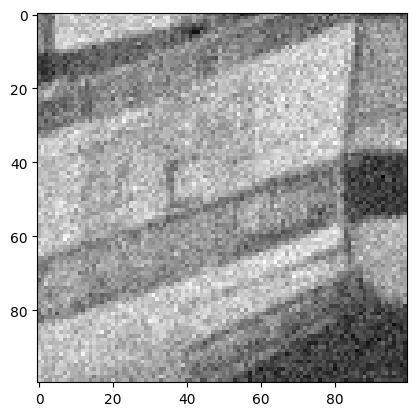

In [19]:
# add noise to image
mean = 0
std_dev = 20
noise = np.random.normal(mean, std_dev, (img.shape[0],img.shape[1]))
noisy_img = img + noise

# display image
print(noisy_img.shape)
plt.imshow(noisy_img, cmap='gray')
plt.show()

In [4]:
# Partial Derivative Approximations

def Ix(I,i,j):
  return (I[i+1,j] - I[i-1,j]) / 2

def Iy(I,i,j):
  return (I[i,j+1] - I[i,j-1]) / 2

def Ixx(I,i,j):
  return (I[i+1,j] - 2*I[i,j] + I[i-1,j])

def Iyy(I,i,j):
  return (I[i,j+1] - 2*I[i,j] + I[i,j-1])

def Ixy(I,i,j):
  return (I[i+1,j+1] - I[i+1,j-1] - I[i-1,j+1] + I[i-1,j-1]) / 4

In [7]:
def TV(I, timestep, iterations, skip):
  E = .5

  # iterate through all the pixels in the image
  for iter in range(iterations):
    for i in range(1,I.shape[0]-1):
      for j in range(1,I.shape[1]-1):
        I[i,j] = I[i,j] + timestep * ( ((Ix(I,i,j)**2)*Iyy(I,i,j) - 2*Ix(I,i,j)*Iy(I,i,j)*Ixy(I,i,j) + (Iy(I,i,j)**2)*Ixx(I,i,j) + (E**2)*(Ixx(I,i,j) + Iyy(I,i,j))) / (((Ix(I,i,j)**2) + (Iy(I,i,j)**2) + (E**2))**(3/2)) )
    
    # display progress
    if (iter % skip == 0):
      print(iter)
      plt.imshow(I,cmap='gray')
      plt.show()

0


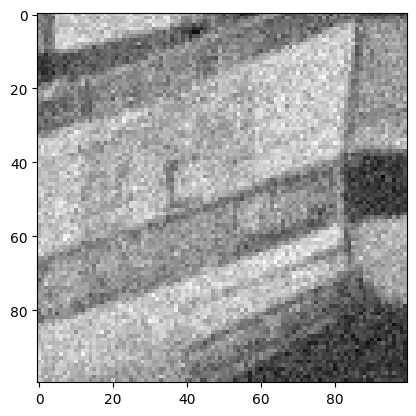

10


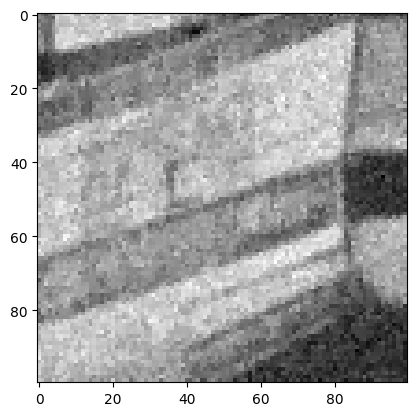

20


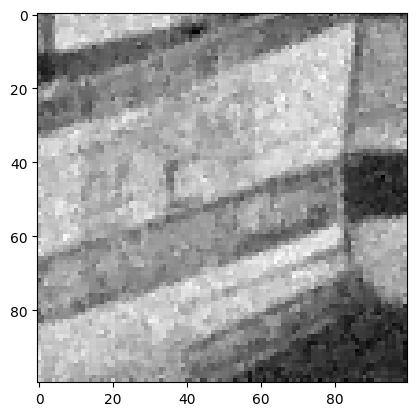

30


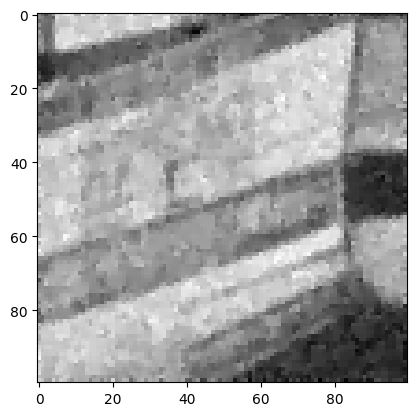

40


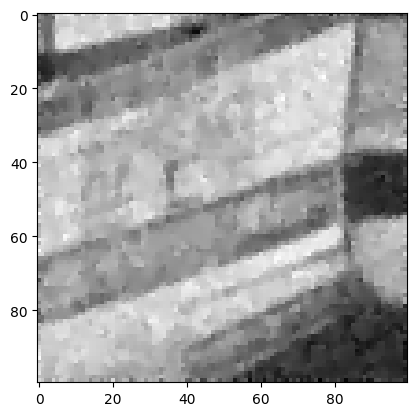

50


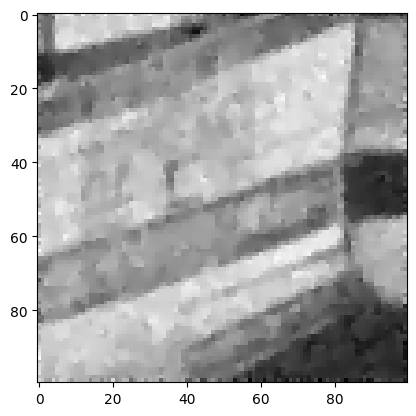

60


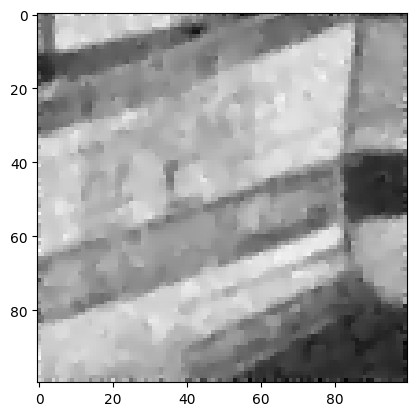

70


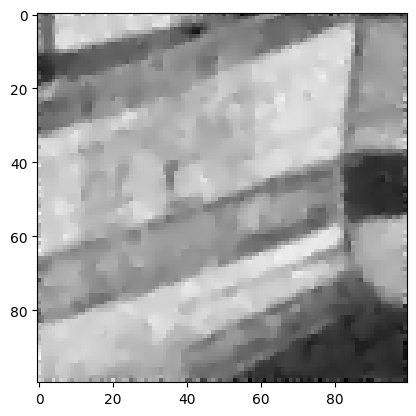

80


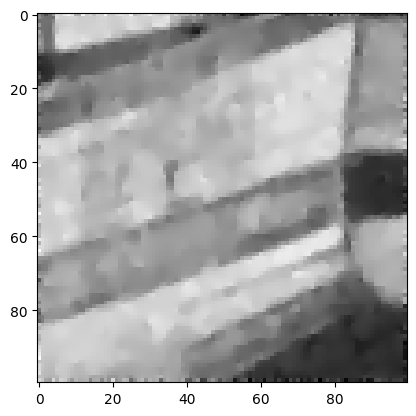

90


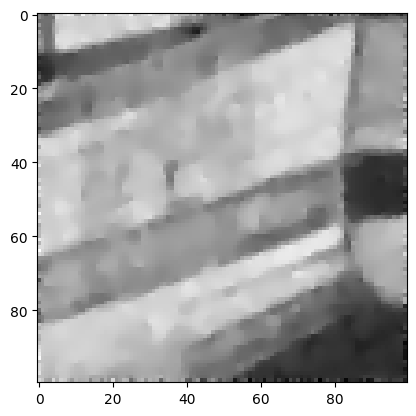

100


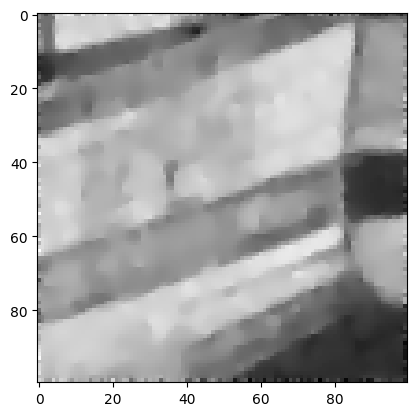

110


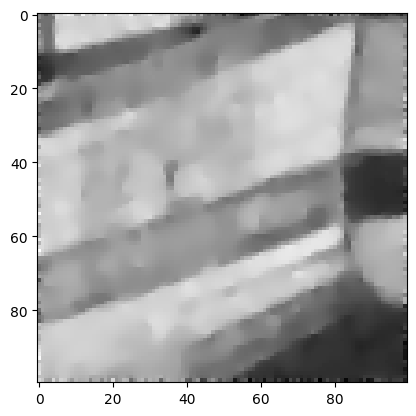

120


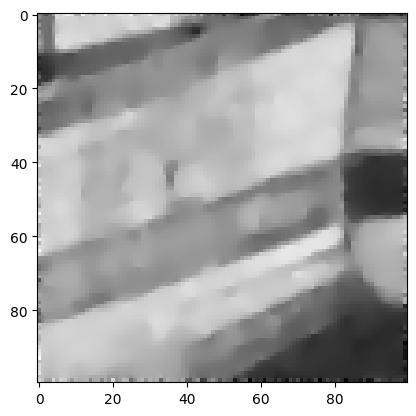

130


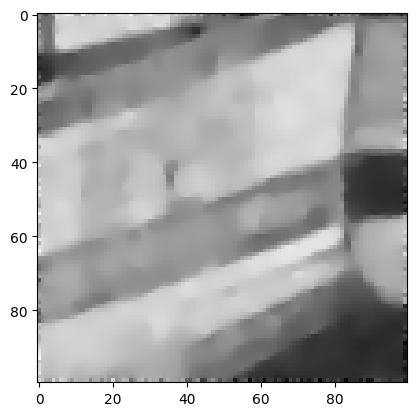

140


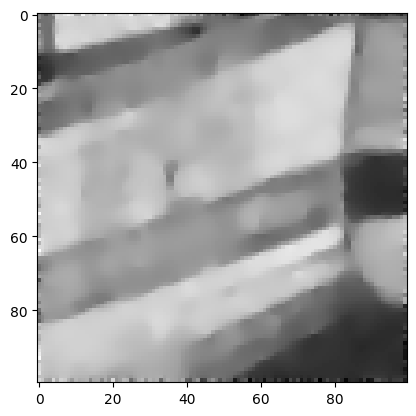

150


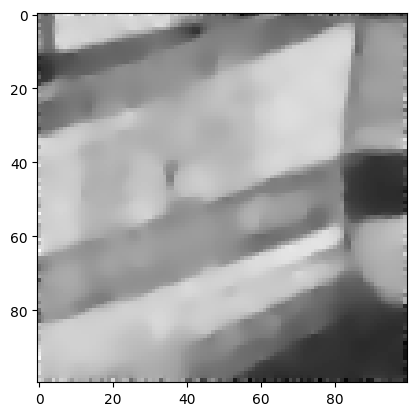

160


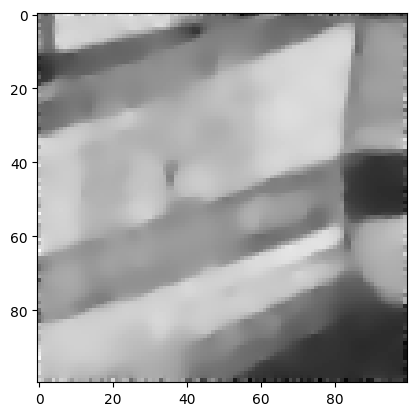

170


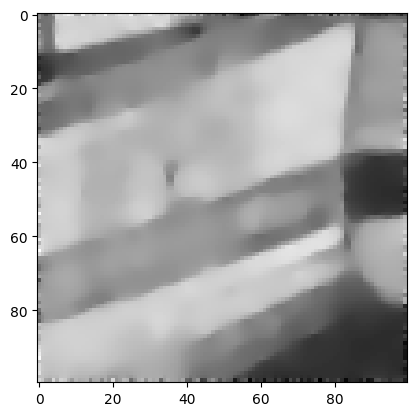

180


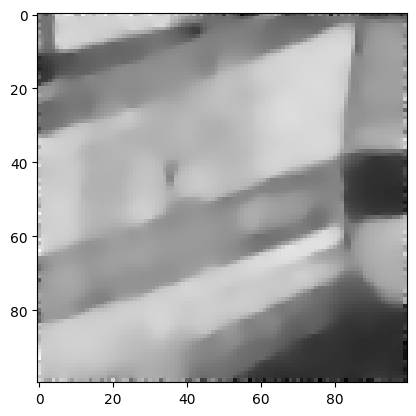

190


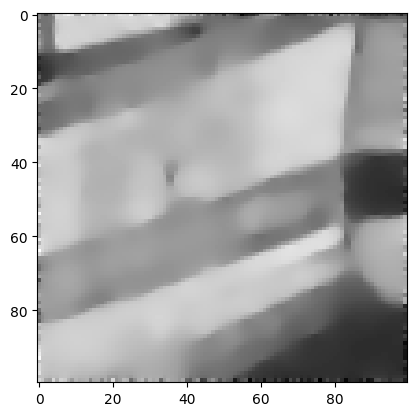

In [20]:
# run test
timestep = .2
iterations = 200
skip = 10

TV(noisy_img, timestep, iterations, skip)